# Diabetis Mellitus US Analysis

## The Goals of the Analysis

 1 - Identefing the demographic characteristics of the American population with diabetes

 2 - Evaluating the most prevalent health risk factors among people with diabetes    
 
 3 - Investigating if there a relationship between Poverty and the prevalence of diabetes
 
 4 - How has the percentage of undiagnosed and diagnosed diabetes changed over time in the US?
 
 5 - Which US counties have the highest diagnosed diabetes rates, and what is the total population of those counties?
 
 6 - What are the top 20 states with the highest overall percentage of diagnosed diabetes?
 
 7 - What are the top 20 counties-states with the highest overall cases of diagnosed diabetes?
 
 8 - How does the percentage of children in poverty correlate with diagnosed diabetes rates at the county level?
 
 9 - Is there a relationship between race and ethnicity and the prevalence of obesity and physical inactivity in a county?
 
 10 - What is the relationship between the overall obesity rate and the diagnosed diabetes rate at the county level?
 
 11 - Which counties have a high percentage of diagnosed diabetes? 





In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## How has the percentage of undiagnosed and diagnosed diabetes changed over time in the US?

### Methodology:
1- Uploading the dataset and cleaning it 

2- Converting the data types

3- Plotting diagnosed cases and undiagnosed cases across time on a line plot

In [369]:
# Importing the dataset of diagnosed and undiagnosed diabetes in the USA over time
diabetes_overtime = pd.read_csv('T2 Diagnosed over time .csv', encoding='latin1')

In [370]:
diabetes_overtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Time Period                       9 non-null      object
 1   Diagnosed_diabetes_Percentage     9 non-null      object
 2   Undiagnosed_diabetes_Percentage   9 non-null      object
 3   Total_diabetes_Percentage         9 non-null      object
dtypes: object(4)
memory usage: 420.0+ bytes


In [372]:
# Cleaning the dataset
diabetes_overtime['Diagnosed_diabetes_Percentage'] = diabetes_overtime['Diagnosed_diabetes_Percentage'].astype(str).str.extract(r"^([\d\.]+)")
diabetes_overtime['Undiagnosed_diabetes_Percentage '] = diabetes_overtime['Undiagnosed_diabetes_Percentage '].astype(str).str.extract(r"^([\d\.]+)")
diabetes_overtime['Total_diabetes_Percentage '] = diabetes_overtime['Total_diabetes_Percentage '].astype(str).str.extract(r"^([\d\.]+)")

In [375]:
#transforming the 'Time Period' column to datetime format
diabetes_overtime["Time Period"] = pd.to_datetime(diabetes_overtime["Time Period"], errors="coerce").copy()

C:\Users\islam\AppData\Local\Temp\ipykernel_4424\3502562307.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diabetes_overtime["Time Period"] = pd.to_datetime(diabetes_overtime["Time Period"], errors="coerce").copy()


In [376]:
# Cleaning the 'Time Period' column to have consistent formatting
diabetes_overtime['Time Period'].at[0] = '2001-2004'
diabetes_overtime['Time Period'].at[1] = '2003-2006'
diabetes_overtime['Time Period'].at[2] = '2005-2008'
diabetes_overtime['Time Period'].at[3] = '2007-2010'
diabetes_overtime['Time Period'].at[4] = '2009-2012'
diabetes_overtime['Time Period'].at[5] = '2011-2014'
diabetes_overtime['Time Period'].at[6] = '2013-2016'
diabetes_overtime['Time Period'].at[7] = '2015-2018'
diabetes_overtime['Time Period'].at[8] = '2017-2020'

In [378]:
# Converting the percentage columns to numeric
columnss = ['Diagnosed_diabetes_Percentage', 'Undiagnosed_diabetes_Percentage ', 'Total_diabetes_Percentage ']

for col in columnss:
    diabetes_overtime[col] = pd.to_numeric(diabetes_overtime[col], errors='coerce')

In [379]:
diagnosed_over_time = diabetes_overtime[['Time Period', 'Diagnosed_diabetes_Percentage']]
undiagnosed_over_time = diabetes_overtime[['Time Period', 'Undiagnosed_diabetes_Percentage ']]
diabetes_overtime

,Time Period,Diagnosed_diabetes_Percentage,Undiagnosed_diabetes_Percentage,Total_diabetes_Percentage
0,2001-2004,7.1,3.2,10.3
1,2003-2006,7.4,2.8,10.2
2,2005-2008,7.7,2.9,10.6
3,2007-2010,7.9,3.2,11.1
4,2009-2012,8.1,3.2,11.3
5,2011-2014,8.7,2.7,11.5
6,2013-2016,9.4,2.6,12.0
7,2015-2018,9.8,2.9,12.7
8,2017-2020,10.1,3.1,13.2


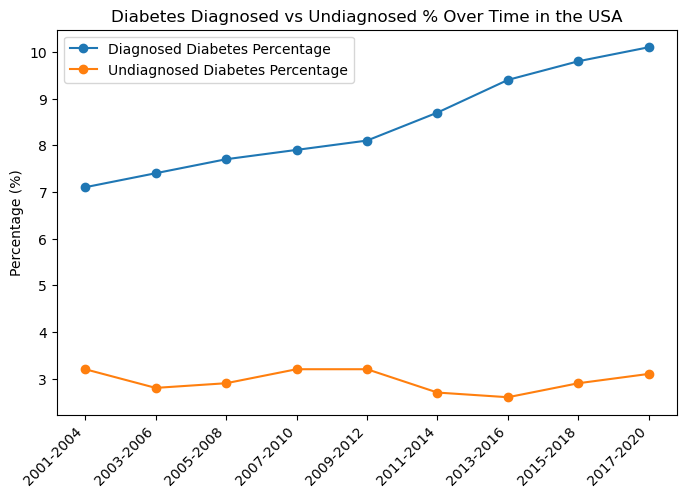

<Figure size 640x480 with 0 Axes>

In [387]:
# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(diagnosed_over_time['Time Period'], diagnosed_over_time['Diagnosed_diabetes_Percentage'], marker='o', label='Diagnosed Diabetes Percentage')
plt.plot(undiagnosed_over_time['Time Period'], undiagnosed_over_time['Undiagnosed_diabetes_Percentage '], marker='o', label='Undiagnosed Diabetes Percentage')
plt.title('Diabetes Diagnosed vs Undiagnosed % Over Time in the USA')
plt.legend()
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 45, ha = 'right')

plt.show()
plt.tight_layout()

## Identefing the demographic characteristics of the American population with diabetes

### Methodology:

1- Uploading and Cleaning dataset

2- Plotting diagnosed and undiagnosed diabetes percentages by age group

3- Plotting a Pie Chart for gender diagnosed vs undiagnosed

In [14]:
# Importing the datasets
df_t2_prevalence = pd.read_csv('T2_Disease_pervalence.csv', encoding='latin1')
df_t2_prevalence

,Characteristic,Diagnosed diabetes Number in Millions,Undiagnosed diabetes Number in Millions,Total diabetes Number in Millions
0,Total,29.4,8.7 (7.010.5),38.1 (34.242.0)
1,1844,3.5,2.2 (1.53.0),5.8 (4.76.8)
2,4564,12.0,3.8 (2.74.8),15.8 (13.418.2)
3,>65,13.8,2.7 (1.63.8),16.5 (15.018.1)
4,Men,16.1,3.7 (2.64.8),19.8 (17.422.1)
5,Women,13.3,5.0 (3.36.7),18.3 (15.321.3)
6,"White, non-Hispanic",17.8,4.3 (2.46.1),22.1 (18.525.7)
7,"Black, non-Hispanic",4.0,1.4 (1.01.9),5.4 (4.76.1)
8,"Asian, non-Hispanic",1.8,0.9 (0.51.2),2.7 (2.23.1)
9,Hispanic,5.0,1.9 (1.42.4),6.9 (6.27.6)


In [16]:
# Removeing range practice from the dataset
df_t2_prevalence["Undiagnosed diabetes Number in Millions"] = df_t2_prevalence["Undiagnosed diabetes Number in Millions"].astype(str).str.extract(r"^([\d\.]+)")

In [ ]:
df_t2_prevalence["Total diabetes Number in Millions"] = df_t2_prevalence["Total diabetes Number in Millions"].astype(str).str.extract(r"^([\d\.]+)")
df_t2_prevalence.inplace = True

In [23]:
# Converting the columns to float
df_t2_prevalence[["Total diabetes Number in Millions", "Undiagnosed diabetes Number in Millions"]] = df_t2_prevalence[["Total diabetes Number in Millions", "Undiagnosed diabetes Number in Millions"]].astype(float)

In [26]:
# Changing the age row string 
df_t2_prevalence['Characteristic'].at[1] = '18 to 44'
df_t2_prevalence['Characteristic'].at[2] = '45 to 64'


In [ ]:
# Creating age group dataframe
df_age_gp = df_t2_prevalence.loc[[1,2,3]]

,Characteristic,Diagnosed diabetes Number in Millions,Undiagnosed diabetes Number in Millions,Total diabetes Number in Millions
1,18 to 44,3.5,2.2,5.8
2,45 to 64,12.0,3.8,15.8
3,>65,13.8,2.7,16.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


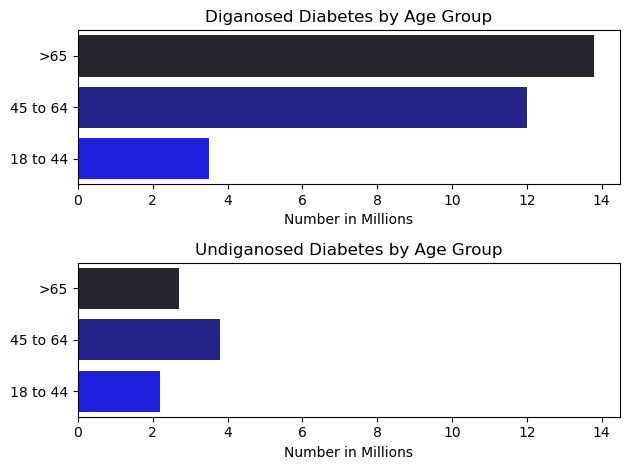

In [38]:
# Plotting the age group data
df_gp_diagnosed = df_age_gp[['Characteristic', 'Diagnosed diabetes Number in Millions']].set_index('Characteristic')
df_gp_undiagnosed = df_age_gp[['Characteristic', 'Undiagnosed diabetes Number in Millions']].set_index('Characteristic')

fig, ax = plt.subplots(2, 1)  

sns.barplot(data=df_gp_diagnosed, x='Diagnosed diabetes Number in Millions', y=df_gp_diagnosed.index, ax=ax[0], palette="dark:b_r")
ax[0].invert_yaxis()
ax[0].set_title('Diganosed Diabetes by Age Group')
ax[0].set_ylabel('')
ax[0].set_xlabel('Number in Millions')
ax[0].legend().remove()



sns.barplot(data=df_gp_undiagnosed, x='Undiagnosed diabetes Number in Millions', y=df_gp_undiagnosed.index, ax=ax[1], palette="dark:b_r")
ax[1].invert_yaxis()
ax[1].set_title('Undiganosed Diabetes by Age Group')
ax[1].set_ylabel('')
ax[1].set_xlabel('Number in Millions')
ax[1].set_xlim(ax[0].get_xlim())  
ax[1].legend().remove()

plt.tight_layout()
plt.show()

In [ ]:
# creating a gender dataframe

df_gender = df_t2_prevalence.loc[[4,5]]

# Calculating the percentage of diagnosed and undiagnosed diabetes by gender
df_male_diagnosed_per = df_gender['Diagnosed diabetes Number in Millions'].at[4] / df_t2_prevalence['Diagnosed diabetes Number in Millions'].at[0] * 100
df_female_diagnosed_per = df_gender['Diagnosed diabetes Number in Millions'].at[5] / df_t2_prevalence['Diagnosed diabetes Number in Millions'].at[0] * 100
df_male_undiagnosed_per = df_gender['Undiagnosed diabetes Number in Millions'].at[4] / df_t2_prevalence['Undiagnosed diabetes Number in Millions'].at[0] * 100
df_female_undiagnosed_per = df_gender['Undiagnosed diabetes Number in Millions'].at[5] / df_t2_prevalence['Undiagnosed diabetes Number in Millions'].at[0] * 100

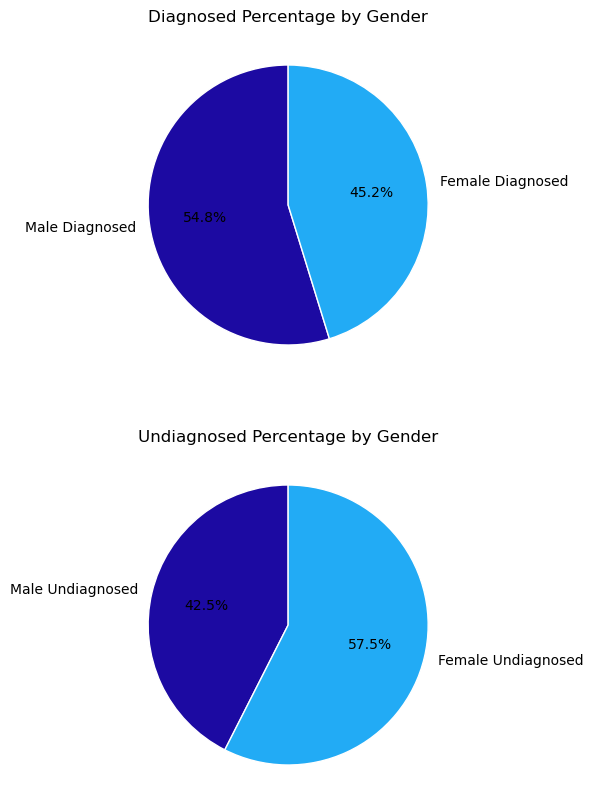

<Figure size 640x480 with 0 Axes>

In [107]:
# Creating a pie charts for the gender data

diagnosed_values = [df_male_diagnosed_per, df_female_diagnosed_per]
undiagnosed_values = [df_male_undiagnosed_per, df_female_undiagnosed_per]

diagnosed_labels = ["Male Diagnosed", "Female Diagnosed"]
undiagnosed_labels = ["Male Undiagnosed", "Female Undiagnosed"]

fig, ax = plt.subplots(2, 1)
fig.set_size_inches((12, 10))

# First pie chart for diagnosed data
plt.subplot(2, 1, 1)
plt.pie(diagnosed_values, labels=diagnosed_labels, autopct='%1.1f%%', startangle=90, colors=["#1c0aa2", "#22ABF5"], wedgeprops={"edgecolor":"white"})
plt.title('Diagnosed Percentage by Gender')

# Second pie chart for undiagnosed data
plt.subplot(2, 1, 2)
plt.pie(undiagnosed_values, labels=undiagnosed_labels, autopct='%1.1f%%', startangle=90, colors=["#1c0aa2", "#22ABF5"], wedgeprops={"edgecolor":"white"})
plt.title('Undiagnosed Percentage by Gender')

plt.show()
plt.tight_layout()

## What are the most Race or Ethinicity that diagnosed with diabetes 

In [103]:
# Importing Ethinicity and Race dataset
df_race_subgp = pd.read_csv('T2_race_and_ethnicity.csv', encoding='latin1')

# Cleaning the data
df_race_subgp["Total_Percentage"] = df_race_subgp["Total_Percentage"].astype(str).str.extract(r"^([\d\.]+)")


In [104]:
df_race_subgp['Total_Percentage'] = df_race_subgp['Total_Percentage'].astype(float)
df_race_subgp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   T2_Race_Ethnicity_Subgroup  20 non-null     object 
 1   Total_Percentage            20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [105]:
# Sorting the values to visualize the highest percentage first
df_race_subgp = df_race_subgp.sort_values(by= 'Total_Percentage',ascending=False)

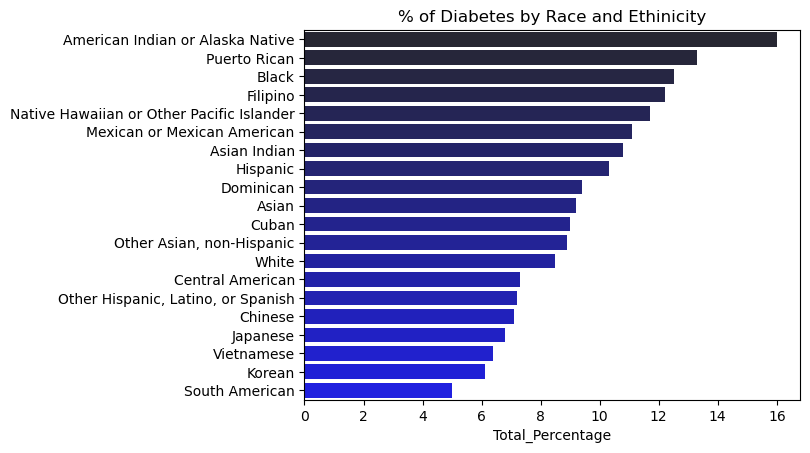

In [115]:
sns.barplot(data=df_race_subgp, x='Total_Percentage', y='T2_Race_Ethnicity_Subgroup', palette='dark:b')
plt.title('% of Diabetes by Race and Ethinicity')
plt.ylabel('')
plt.show()

## What are the most prevalent health risk factors among people with diabetes?

In [113]:
# Uploading the risk factors dataset
df_risk_factors = pd.read_csv('Risk_factors_precentages.csv', encoding='latin1')
df_risk_factors

,Risk factors for diabetes-related complications,Percentage
0,Current tobacco user based on self-report or s...,22.1
1,Current cigarette smoker based on self-report,14.6
2,Former cigarette smoker,36.0
3,BMI ?25.0 kg/m2,89.8
4,BMI 25.029.9 kg/m2,26.9
5,BMI 30.039.9 kg/m2,47.1
6,BMI ?40.0 kg/m2,15.7
7,Physical inactivity,31.9
8,A1C?7.0%,47.4
9,A1C 7.07.9%,22.9


In [ ]:
# Sorting the Risk factors values to visualize the highest percentage first
df_risk_factors = df_risk_factors.sort_values(by= 'Percentage',ascending=False)

,Risk factors for diabetes-related complications,Percentage
3,BMI ?25.0 kg/m2,89.8
12,Blood pressure ?130/80 mmHg or taking antihype...,80.6
13,Blood pressure ?140/90 mmHg or taking antihype...,70.8
8,A1C?7.0%,47.4
5,BMI 30.039.9 kg/m2,47.1
14,Non-HDL ?130 mg/dL,39.5
2,Former cigarette smoker,36.0
7,Physical inactivity,31.9
4,BMI 25.029.9 kg/m2,26.9
9,A1C 7.07.9%,22.9


In [133]:
# Cleaning the risk factors data
df_risk_factors['Risk factors for diabetes-related complications'].at[3] = 'BMI >= 25Kg/m2'
df_risk_factors['Risk factors for diabetes-related complications'].at[12] = 'BP >= 130/80 mmHg'
df_risk_factors['Risk factors for diabetes-related complications'].at[13] = 'BP >= 140/90 mmHg'
df_risk_factors['Risk factors for diabetes-related complications'].at[5] = 'BMI 30-39.9 Kg/m2'
df_risk_factors['Risk factors for diabetes-related complications'].at[8] = 'A1C >= 7%'
df_risk_factors['Risk factors for diabetes-related complications'].at[14] = 'Non-HDL >= 130 mg/dL'

In [ ]:
# Visualizing the top 8 risk factors for diabetes related complications
df_risk_top8 = df_risk_factors.head(8)
df_risk_top8

,Risk factors for diabetes-related complications,Percentage
3,BMI >= 25Kg/m2,89.8
12,BP >= 130/80 mmHg,80.6
13,BP >= 140/90 mmHg,70.8
8,A1C >= 7%,47.4
5,BMI 30-39.9 Kg/m2,47.1
14,Non-HDL >= 130 mg/dL,39.5
2,Former cigarette smoker,36.0
7,Physical inactivity,31.9


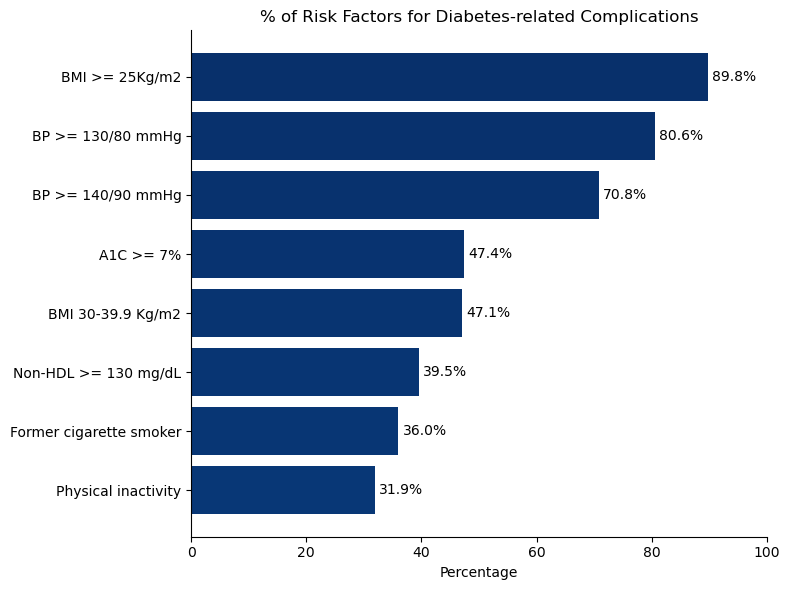

In [135]:
fig, ax = plt.subplots(figsize=(8,6))

# Horizontal bar chart
bars = ax.barh(
    df_risk_top8['Risk factors for diabetes-related complications'],
    df_risk_top8['Percentage'],
    color=plt.cm.Blues_r(range(len(df_risk_top8)))
)

# Add percentage labels to bars
ax.bar_label(bars, fmt='%.1f%%', padding=3, color="black", fontsize=10)

# Title and labels
ax.set_title('% of Risk Factors for Diabetes-related Complications')
ax.set_xlabel("Percentage")
ax.set_ylabel("")

# Remove top and right lines (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis limit
ax.set_xlim(0, 100)

# Inverting Yaxis
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## Is there a relationship between race and ethnicity and the prevalence of obesity and physical inactivity in a county?

In [535]:
# Uploading the Atlas dataset for SVI
atlas_main = pd.read_csv('DiabetesAtlasData SVI.csv')
# Uploading counties population dataset
county_pop = pd.read_csv('USA counties population.csv', encoding='latin1')

In [536]:
county_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Geographic Area    3145 non-null   object
 1   county_population  3145 non-null   object
 2   2020               3145 non-null   object
 3   2021               3145 non-null   object
 4   2022               3145 non-null   object
 5   2023               3145 non-null   object
 6   2024               3145 non-null   object
dtypes: object(7)
memory usage: 172.2+ KB


In [537]:
county_pop

,Geographic Area,county_population,2020,2021,2022,2023,2024
0,".Autauga County, Alabama","58,800","58,909","59,191","59,736","60,436","61,464"
1,".Baldwin County, Alabama","231,767","233,244","239,411","246,577","254,107","261,608"
2,".Barbour County, Alabama","25,226","24,975","24,517","24,722","24,644","24,358"
3,".Bibb County, Alabama","22,284","22,176","22,344","21,983","21,890","22,258"
4,".Blount County, Alabama","59,130","59,110","59,050","59,491","59,777","60,163"
...,...,...,...,...,...,...,...
3141,".Uinta County, Wyoming","20,448","20,461","20,690","20,722","20,724","20,621"
3142,".Washakie County, Wyoming","7,685","7,663","7,727","7,728","7,736","7,662"
3143,".Weston County, Wyoming","6,838","6,817","6,747","6,872","6,828","6,866"
3144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [538]:
# Cleaning the population data 
county_pop['county_population'] = pd.to_numeric(
   county_pop['county_population'].astype(str).str.replace(",", ""),
    errors="coerce")

#  Split the geographic str in to 2 separate columns
county_pop[['County', 'State']] = county_pop['Geographic Area'].str.split(', ', expand=True)

In [539]:
# Dropping unnecessary columns
county_pop = county_pop.drop(columns=['2020', '2021', '2022', '2023', '2024'])
county_pop = county_pop.drop(columns=['Geographic Area'])

In [540]:
# Cleaning the county name and removing the dot 
county_pop['County'] = county_pop['County'].str.lstrip('.')

In [541]:
# Merging the population data with the atlas data
merged_df = pd.merge(atlas_main, county_pop, how='left', left_on=['County', 'State'], right_on=['County', 'State'])

In [542]:
merged_df

,County_FIPS,County,State,Overall SVI-2018-Percentile,county_population
0,1001,Autauga County,Alabama,0.4354,58800.0
1,1003,Baldwin County,Alabama,0.2162,231767.0
2,1005,Barbour County,Alabama,0.9959,25226.0
3,1007,Bibb County,Alabama,0.6003,22284.0
4,1009,Blount County,Alabama,0.4242,59130.0
...,...,...,...,...,...
3137,56039,Teton County,Wyoming,0.1127,23327.0
3138,56041,Uinta County,Wyoming,0.4522,20448.0
3139,56043,Washakie County,Wyoming,0.3732,7685.0
3140,56045,Weston County,Wyoming,0.3475,6838.0


In [543]:
# Uploading obesity and physical inactivity data for white, black, and hispanic
black_obesity = pd.read_csv('DAD black obees.csv', encoding='latin1')
black_inactivity = pd.read_csv('DAD black inactivity.csv', encoding='latin1')
white_obesity = pd.read_csv('DAD white obees.csv', encoding='latin1')
white_inactivity = pd.read_csv('DAD white inactivity.csv', encoding='latin1')
hispanic_obesity = pd.read_csv('DAD hispanic obees.csv', encoding='latin1')
hispanic_inactivity = pd.read_csv('DAD hispanic inactivity.csv', encoding='latin1')
asian_inactivity = pd.read_csv('DAD Asian inactivity.csv', encoding='latin1')
asian_obesity = pd.read_csv('DAD Asian obees.csv', encoding='latin1')
namerican_inactivity = pd.read_csv('DAD namerican inactivity.csv', encoding='latin1')
namerican_obees = pd.read_csv('DAD namerican obees.csv', encoding='latin1')


In [544]:
diagnosed_usa = pd.read_csv('DAD diagnosed and economics.csv', encoding='latin1')

In [545]:
diagnosed_usa

,County_FIPS,County,State,Diagnosed Diabetes-2021-Percentage,Children in Poverty-2022 & 2018-2022-Percentage
0,9150,Northeastern Connecticut Planning Region,Connecticut,No Data,No Data
1,9160,Northwest Hills Planning Region,Connecticut,No Data,No Data
2,2280,Wrangell-Petersburg Census Area,Alaska,No Data,No Data
3,9130,Lower Connecticut River Valley Planning Region,Connecticut,No Data,No Data
4,9140,Naugatuck Valley Planning Region,Connecticut,No Data,No Data
...,...,...,...,...,...
3156,28125,Sharkey County,Mississippi,8.9,54.3
3157,22107,Tensas Parish,Louisiana,8.4,55
3158,1105,Perry County,Alabama,11,61.2
3159,28055,Issaquena County,Mississippi,8.7,88.7


In [546]:
# Dropping County_FIPS column if exists
white_obesity = white_obesity.drop(columns=['County_FIPS'], errors='ignore')
white_inactivity = white_inactivity.drop(columns=['County_FIPS'], errors='ignore')
black_obesity = black_obesity.drop(columns=['County_FIPS'], errors='ignore')
black_inactivity = black_inactivity.drop(columns=['County_FIPS'], errors='ignore')
hispanic_obesity = hispanic_obesity.drop(columns=['County_FIPS'], errors='ignore')
hispanic_inactivity = hispanic_inactivity.drop(columns=['County_FIPS'], errors='ignore')
asian_inactivity = asian_inactivity.drop(columns=['County_FIPS'], errors='ignore')
asian_obesity = asian_obesity.drop(columns=['County_FIPS'], errors='ignore')
namerican_inactivity = namerican_inactivity.drop(columns=['County_FIPS'], errors='ignore')
namerican_obees = namerican_obees.drop(columns=['County_FIPS'], errors='ignore')
diagnosed_usa = diagnosed_usa.drop(columns=['County_FIPS'], errors='ignore')

In [547]:
# Merging obesity and inactivity data with the final dataframe
# Start with the main merged_df
full_df = merged_df.copy()

# Merge Black obesity
full_df = full_df.merge(black_obesity, on=['County','State'], how='left')

# Merge Black inactivity
full_df = full_df.merge(black_inactivity, on=['County','State'], how='left')

# Merge White obesity
full_df = full_df.merge(white_obesity, on=['County','State'], how='left')

# Merge White inactivity
full_df = full_df.merge(white_inactivity, on=['County','State'], how='left')

# Merge Hispanic obesity
full_df = full_df.merge(hispanic_obesity, on=['County','State'], how='left')

# Merge Hispanic inactivity
full_df = full_df.merge(hispanic_inactivity, on=['County','State'], how='left')

# Merge Asian obesity
full_df = full_df.merge(asian_obesity, on=['County','State'], how='left')
# Merge Asian inactivity
full_df = full_df.merge(asian_inactivity, on=['County','State'], how='left')
# Merge Native American obesity
full_df = full_df.merge(namerican_obees, on=['County','State'], how='left')
# Merge Native American inactivity
full_df = full_df.merge(namerican_inactivity, on=['County','State'], how='left')
# Merge diagonsed cases and econimics 
full_df = full_df.merge(diagnosed_usa, on=['County','State'], how='left')

full_df

,County_FIPS,County,State,Overall SVI-2018-Percentile,county_population,Black-2022-obesity%,Black-2022-inactivity%,obesity-2021-Percentage,White-2022-obesity%,Physical Inactivity-2021-%,White-2022-Inactivity%,Hispanic-2022-obesity%,Hispanic-2022-inactivity %,Asian-2022-obesity%,Asian-2022-inactivity%,A. Indian & A. Native-2022-obesity%,American Indian & Alaska Native-2022-inactivity%,Diagnosed Diabetes-2021-Percentage,Children in Poverty-2022 & 2018-2022-Percentage
0,1001,Autauga County,Alabama,0.4354,58800.0,21.01,21.01,31.5,72.05,21.3,72.05,3.38,3.38,1.18,1.18,0.47,0.47,8,15.7
1,1003,Baldwin County,Alabama,0.2162,231767.0,8.22,8.22,33.3,82.98,23.1,82.98,5.04,5.04,1.16,1.16,0.81,0.81,9.9,16.1
2,1005,Barbour County,Alabama,0.9959,25226.0,47.2,47.2,30.3,45.27,23.3,45.27,5.1,5.1,0.47,0.47,0.72,0.72,9.2,37.7
3,1007,Bibb County,Alabama,0.6003,22284.0,20.74,20.74,26.7,74,22.6,74,3.18,3.18,0.29,0.29,0.57,0.57,9.1,25.5
4,1009,Blount County,Alabama,0.4242,59130.0,1.73,1.73,25.2,85.99,18.1,85.99,10.07,10.07,0.44,0.44,0.63,0.63,8.5,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56039,Teton County,Wyoming,0.1127,23327.0,0.71,0.71,12.2,79.86,9.8,79.86,15.76,15.76,1.88,1.88,1.14,1.14,4.4,5.3
3138,56041,Uinta County,Wyoming,0.4522,20448.0,0.51,0.51,32.5,86.6,19.2,86.6,10.11,10.11,0.59,0.59,1.46,1.46,7.7,13.2
3139,56043,Washakie County,Wyoming,0.3732,7685.0,0.43,0.43,27.1,82.13,17.7,82.13,14.17,14.17,0.87,0.87,1.7,1.7,7.4,14.3
3140,56045,Weston County,Wyoming,0.3475,6838.0,0.76,0.76,32.2,88.57,23.8,88.57,5.5,5.5,1.5,1.5,2.11,2.11,8.8,14.3


In [548]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   County_FIPS                                       3142 non-null   object 
 1   County                                            3141 non-null   object 
 2   State                                             3141 non-null   object 
 3   Overall SVI-2018-Percentile                       3141 non-null   float64
 4   county_population                                 3033 non-null   float64
 5   Black-2022-obesity%                               3140 non-null   object 
 6   Black-2022-inactivity%                            3140 non-null   object 
 7   obesity-2021-Percentage                           3140 non-null   object 
 8   White-2022-obesity%                               3140 non-null   object 
 9   Physical Inactivity

In [549]:
# Changing the type of the columns to float to start analysis
columns_to_convert = ['Black-2022-obesity%', 'Black-2022-inactivity%','Physical Inactivity-2021-%', 'White-2022-obesity%', 'White-2022-Inactivity%','obesity-2021-Percentage', 'Hispanic-2022-obesity%', 'Hispanic-2022-inactivity %', 'Asian-2022-obesity%', 'Asian-2022-inactivity%', 'A. Indian & A. Native-2022-obesity%', 'American Indian & Alaska Native-2022-inactivity%', 'Diagnosed Diabetes-2021-Percentage', 'Children in Poverty-2022 & 2018-2022-Percentage']

for col in columns_to_convert:
    full_df[col] = pd.to_numeric(full_df[col], errors='coerce')

In [550]:
# checking for the null or missing values in the final dataframe
full_missed = full_df.isnull().sum()
full_missed

County_FIPS                                           0
County                                                1
State                                                 1
Overall SVI-2018-Percentile                           1
county_population                                   109
Black-2022-obesity%                                  10
Black-2022-inactivity%                               10
obesity-2021-Percentage                              70
White-2022-obesity%                                   3
Physical Inactivity-2021-%                           70
White-2022-Inactivity%                                3
Hispanic-2022-obesity%                                3
Hispanic-2022-inactivity %                            3
Asian-2022-obesity%                                   8
Asian-2022-inactivity%                                8
A. Indian & A. Native-2022-obesity%                   6
American Indian & Alaska Native-2022-inactivity%      6
Diagnosed Diabetes-2021-Percentage              

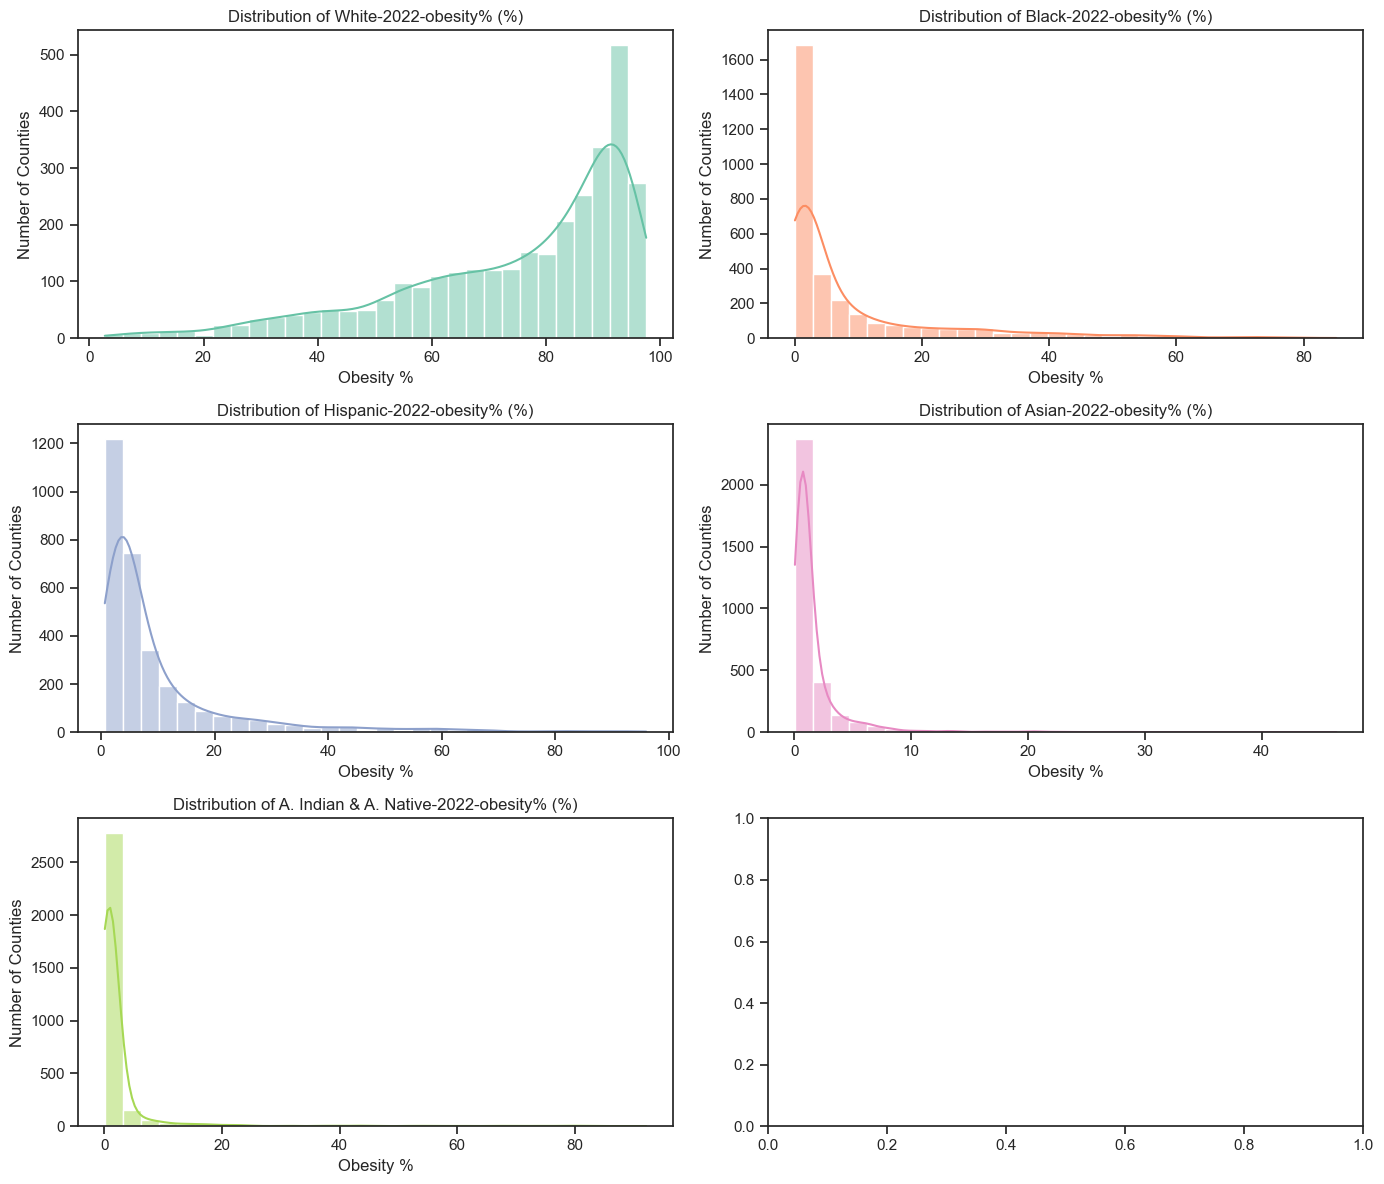

In [551]:
# Plot histogram for obesity percentages 

# List obesity columns
obesity_cols = [
    'White-2022-obesity%',
    'Black-2022-obesity%',
    'Hispanic-2022-obesity%',
    'Asian-2022-obesity%',
    'A. Indian & A. Native-2022-obesity%'
]

# Set up figure with 3 rows × 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  

# Loop through obesity columns and plot each histogram
for i, col in enumerate(obesity_cols):
    sns.histplot(
        data=full_df,
        x=col,
        bins=30,
        kde=True,  
        ax=axes[i],
        color=sns.color_palette("Set2")[i]
    )
    axes[i].set_title(f'Distribution of {col.replace("_"," ")} (%)', fontsize=12)
    axes[i].set_xlabel('Obesity %')
    axes[i].set_ylabel('Number of Counties')

# Adjust layout
plt.tight_layout()
plt.show()

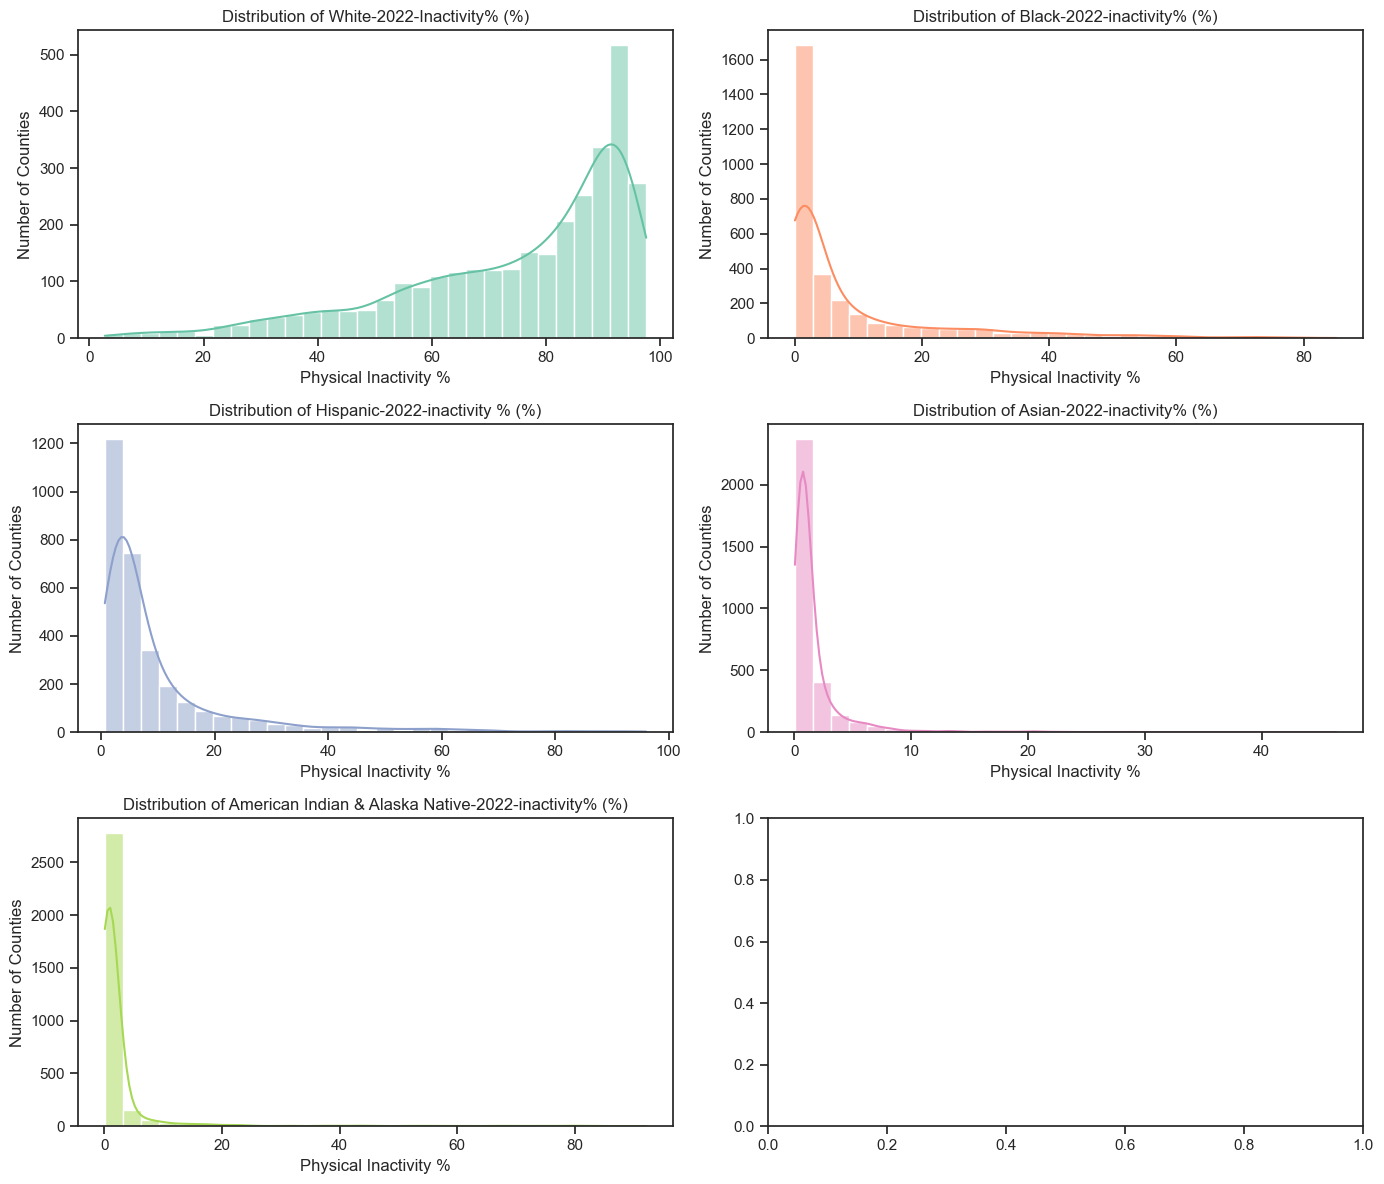

In [552]:
# Plot histogram for physical inactivity percentages 

# List physical inactivity columns
physical_inacticity_cols = [
    'White-2022-Inactivity%',
    'Black-2022-inactivity%',
    'Hispanic-2022-inactivity %',
    'Asian-2022-inactivity%',
    'American Indian & Alaska Native-2022-inactivity%'
]

# Set up figure with 3 rows × 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  

# Loop through obesity columns and plotting each histogram
for i, col in enumerate(physical_inacticity_cols):
    sns.histplot(
        data=full_df,
        x=col,
        bins=30,
        kde=True,  
        ax=axes[i],
        color=sns.color_palette("Set2")[i]
    )
    axes[i].set_title(f'Distribution of {col.replace("_"," ")} (%)', fontsize=12)
    axes[i].set_xlabel('Physical Inactivity %')
    axes[i].set_ylabel('Number of Counties')

# Adjust layout
plt.tight_layout()
plt.show()

## What are the top 10 states with the highest overall percentage of diagnosed diabetes?

In [553]:
top10_obesity_states = full_df.groupby('State')['obesity-2021-Percentage'].mean().nlargest(10).reset_index()
top10_obesity_states

,State,obesity-2021-Percentage
0,Delaware,36.133333
1,Ohio,35.198864
2,West Virginia,34.498182
3,Maryland,33.975000
4,South Carolina,33.378261
5,New York,32.630645
6,Mississippi,32.143902
7,Nebraska,31.759140
8,Maine,31.518750
9,Missouri,31.513913


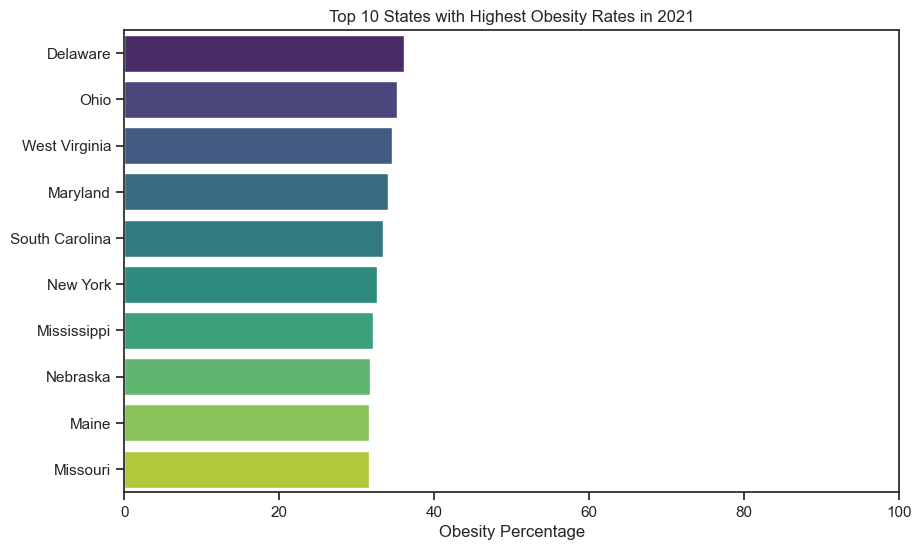

In [554]:
# Plotting highest 10 states with obesity
top10_obesity_states = full_df.groupby('State')['obesity-2021-Percentage'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_obesity_states,
    x='obesity-2021-Percentage',
    y='State',  
    palette='viridis'
)

plt.title('Top 10 States with Highest Obesity Rates in 2021')
plt.xlabel('Obesity Percentage')
plt.ylabel('')
plt.xlim(0, 100)
plt.show()

### Which US counties have the highest diagnosed diabetes rates, and what is the total population of those counties?

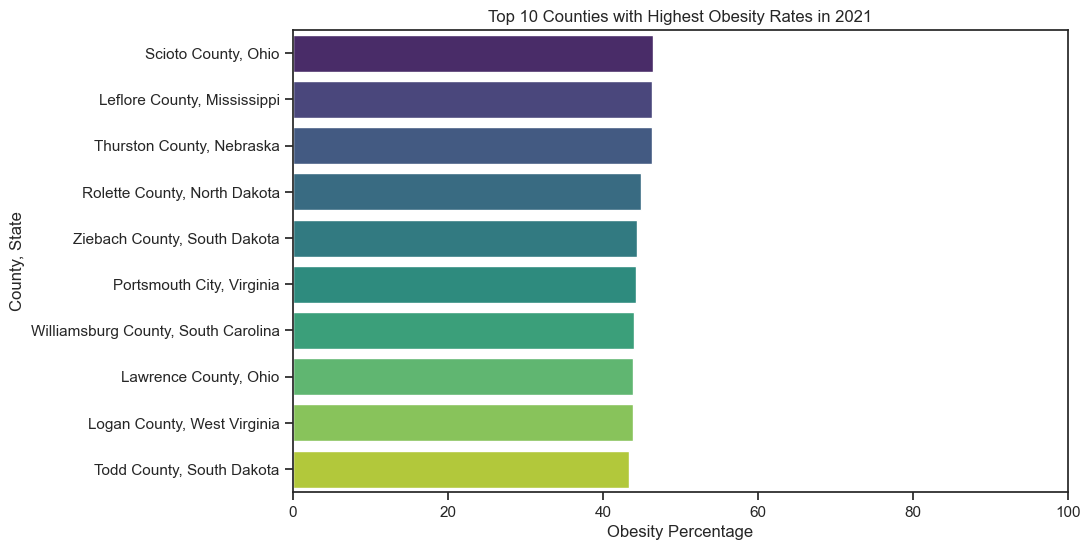

In [555]:
# Plotting highest 10 counties with obesity

top10_obesity = full_df.nlargest(10, 'obesity-2021-Percentage')

# Combine County and State for better labeling
top10_obesity["County_State"] = top10_obesity["County"] + ", " + top10_obesity["State"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_obesity,
    x='obesity-2021-Percentage',
    y='County_State',  
    palette='viridis'
)

plt.title('Top 10 Counties with Highest Obesity Rates in 2021')
plt.xlabel('Obesity Percentage')
plt.ylabel('County, State')
plt.xlim(0, 100)
plt.show()

###   What are the top 20 counties-states with the highest overall cases of diagnosed diabetes?

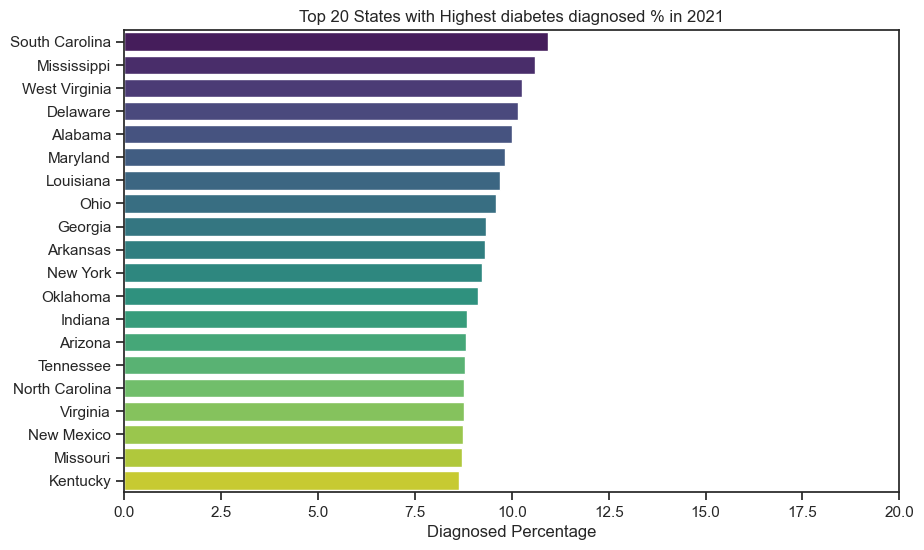

In [556]:
# Plot highest 10 States with Diagnosed Diabetes
top10_diagnosed_states = full_df.groupby('State')['Diagnosed Diabetes-2021-Percentage'].mean().nlargest(20).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_diagnosed_states,
    x='Diagnosed Diabetes-2021-Percentage',
    y='State',  
    palette='viridis'
)

plt.title('Top 20 States with Highest diabetes diagnosed % in 2021')
plt.xlabel('Diagnosed Percentage')
plt.ylabel('')
plt.xlim(0, 20)
plt.show()

In [557]:
full_df

,County_FIPS,County,State,Overall SVI-2018-Percentile,county_population,Black-2022-obesity%,Black-2022-inactivity%,obesity-2021-Percentage,White-2022-obesity%,Physical Inactivity-2021-%,White-2022-Inactivity%,Hispanic-2022-obesity%,Hispanic-2022-inactivity %,Asian-2022-obesity%,Asian-2022-inactivity%,A. Indian & A. Native-2022-obesity%,American Indian & Alaska Native-2022-inactivity%,Diagnosed Diabetes-2021-Percentage,Children in Poverty-2022 & 2018-2022-Percentage
0,1001,Autauga County,Alabama,0.4354,58800.0,21.01,21.01,31.5,72.05,21.3,72.05,3.38,3.38,1.18,1.18,0.47,0.47,8.0,15.7
1,1003,Baldwin County,Alabama,0.2162,231767.0,8.22,8.22,33.3,82.98,23.1,82.98,5.04,5.04,1.16,1.16,0.81,0.81,9.9,16.1
2,1005,Barbour County,Alabama,0.9959,25226.0,47.20,47.20,30.3,45.27,23.3,45.27,5.10,5.10,0.47,0.47,0.72,0.72,9.2,37.7
3,1007,Bibb County,Alabama,0.6003,22284.0,20.74,20.74,26.7,74.00,22.6,74.00,3.18,3.18,0.29,0.29,0.57,0.57,9.1,25.5
4,1009,Blount County,Alabama,0.4242,59130.0,1.73,1.73,25.2,85.99,18.1,85.99,10.07,10.07,0.44,0.44,0.63,0.63,8.5,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56039,Teton County,Wyoming,0.1127,23327.0,0.71,0.71,12.2,79.86,9.8,79.86,15.76,15.76,1.88,1.88,1.14,1.14,4.4,5.3
3138,56041,Uinta County,Wyoming,0.4522,20448.0,0.51,0.51,32.5,86.60,19.2,86.60,10.11,10.11,0.59,0.59,1.46,1.46,7.7,13.2
3139,56043,Washakie County,Wyoming,0.3732,7685.0,0.43,0.43,27.1,82.13,17.7,82.13,14.17,14.17,0.87,0.87,1.70,1.70,7.4,14.3
3140,56045,Weston County,Wyoming,0.3475,6838.0,0.76,0.76,32.2,88.57,23.8,88.57,5.50,5.50,1.50,1.50,2.11,2.11,8.8,14.3


In [558]:
# calculating the total diagnosed diabetes cases in the top 20 states
total_diagnosed_cases = full_df[['Diagnosed Diabetes-2021-Percentage', 'State', 'county_population', 'County']]
total_diagnosed_cases['Total_Cases'] = total_diagnosed_cases['Diagnosed Diabetes-2021-Percentage'] /100 * total_diagnosed_cases['county_population']

C:\Users\islam\AppData\Local\Temp\ipykernel_4424\3121880852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_diagnosed_cases['Total_Cases'] = total_diagnosed_cases['Diagnosed Diabetes-2021-Percentage'] /100 * total_diagnosed_cases['county_population']


### What is the total diabetes population in top 20 counties based on percentage of diganosed cases?

In [559]:
# Calculating the total diagnosed diabetes cases in the top 20 states based on percentage of diagnosed cases
total_diagnosed_cases1 = total_diagnosed_cases.sort_values(by='Diagnosed Diabetes-2021-Percentage', ascending=False).head(20)
total_diagnosed_cases1['Total_Cases'].sum()

311120.08600000007

### What is the total diabetes population in top 20 counties based on total number of diganosed cases?

In [560]:
# Calculating the total diagnosed diabetes cases in the top 20 states based on total number of diagnosed cases
total_diagnosed_cases2 = total_diagnosed_cases.sort_values(by='Total_Cases', ascending=False).head(20)
total_diagnosed_cases2['Total_Cases'].sum()

5706690.37

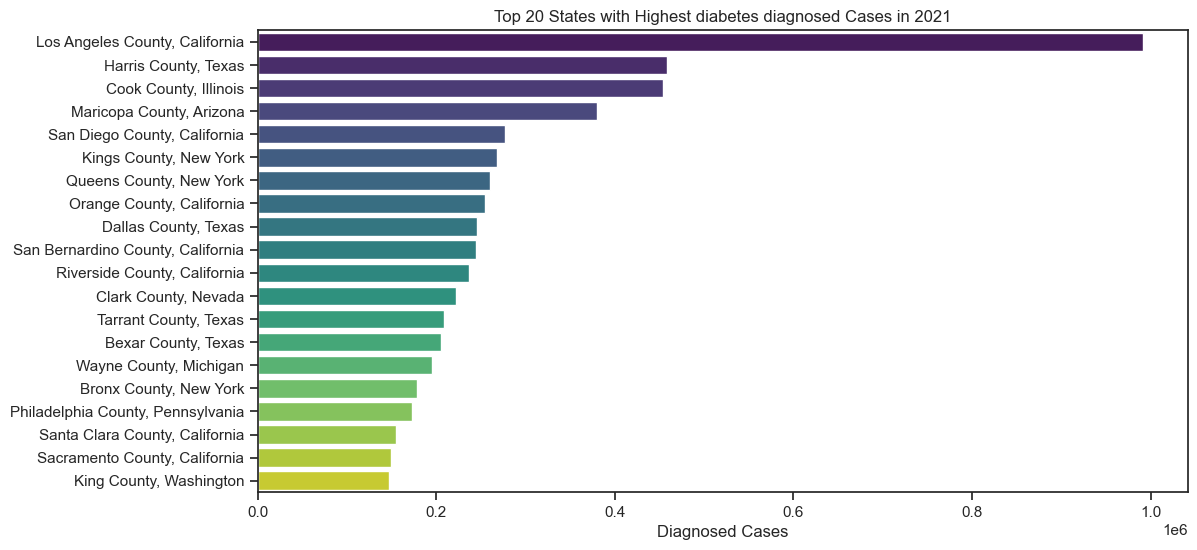

<Figure size 640x480 with 0 Axes>

In [561]:
# Plotting Highest 20 states with Diagnosed Diabetes Cases

# Combine the 'County' and 'State' columns for better readability on the plot
total_diagnosed_cases2['County, State'] = total_diagnosed_cases2['County'] + ', ' + total_diagnosed_cases2['State']

plt.figure(figsize=(12,6))
sns.barplot(
    data=total_diagnosed_cases2,
    x='Total_Cases',
    y='County, State', 
    palette='viridis',
    errorbar=None
)

plt.title('Top 20 States with Highest diabetes diagnosed Cases in 2021')
plt.xlabel('Diagnosed Cases')
plt.ylabel('')

plt.show()
plt.tight_layout()

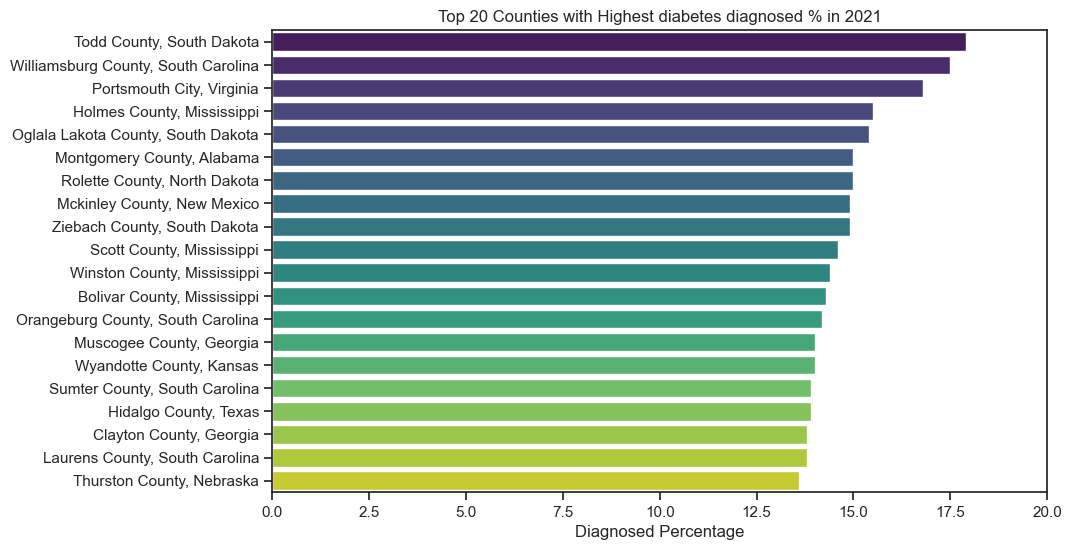

<Figure size 640x480 with 0 Axes>

In [562]:
# Plot highest 20 counties with Diagnosed Diabetes
top10_diagnosed = full_df.nlargest(20, 'Diagnosed Diabetes-2021-Percentage')

top10_diagnosed["County_State"] = top10_diagnosed["County"] + ", " + top10_diagnosed["State"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_diagnosed,
    x='Diagnosed Diabetes-2021-Percentage',
    y='County_State',  
    palette='viridis'
)
plt.title('Top 20 Counties with Highest diabetes diagnosed % in 2021')
plt.xlabel('Diagnosed Percentage')
plt.ylabel('')
plt.xlim(0, 20)
plt.show()
plt.tight_layout()

## Is there a relationship between race and ethnicity and the prevalence of obesity and physical inactivity in a county?

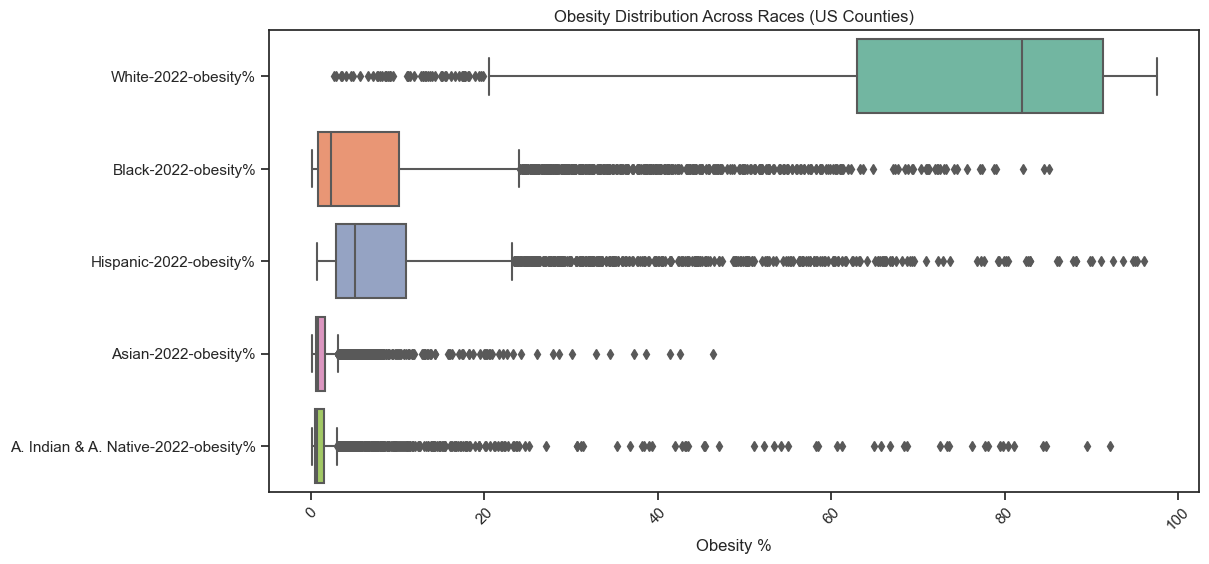

In [563]:
# Boxplots for obesity percentage across races
# Melt dataframe: turn wide columns into "Race" and "Obesity"
obesity_long = full_df.melt(
    value_vars=obesity_cols,
    var_name='Race',
    value_name='Obesity %'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=obesity_long,
    x='Obesity %',
    y='Race',
    palette="Set2"
)
plt.xticks(rotation=45)
plt.title('Obesity Distribution Across Races (US Counties)')
plt.ylabel('')
plt.show()


## What is the distribution of Physical inactivity percentage across different Ethinic group?

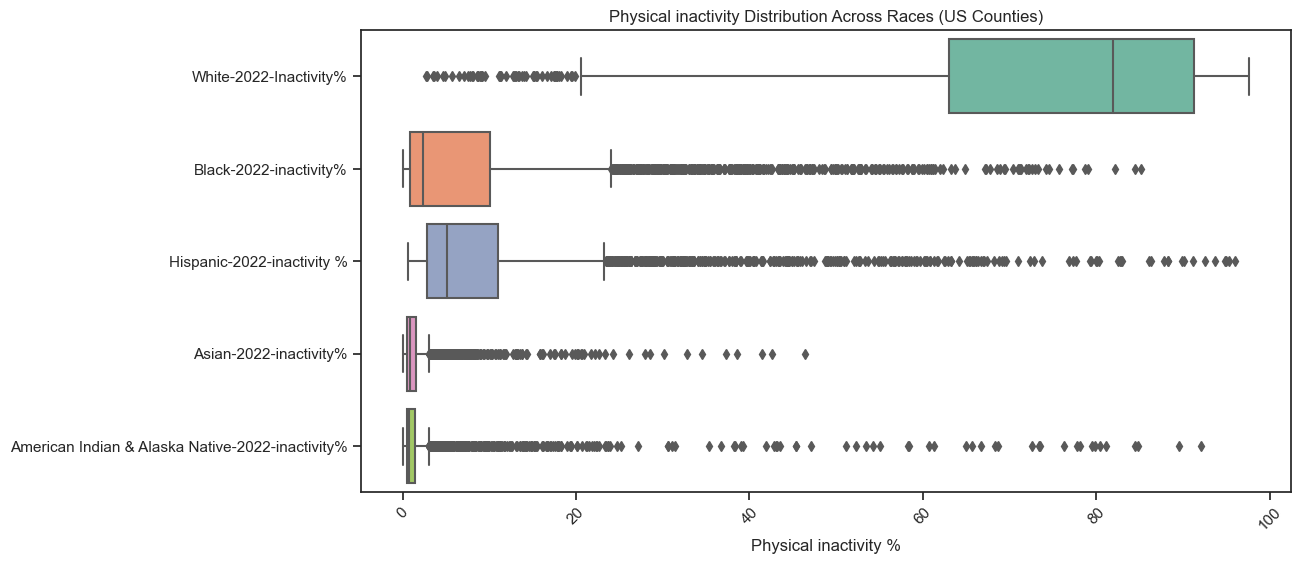

In [564]:
ph_inactivity_long = full_df.melt(
    value_vars=physical_inacticity_cols,
    var_name='Race',
    value_name='Physical inactivity %'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=ph_inactivity_long,
    x='Physical inactivity %',
    y='Race',
    palette="Set2"
)
plt.xticks(rotation=45)
plt.title('Physical inactivity Distribution Across Races (US Counties)')
plt.ylabel('')
plt.show()

## How does the percentage of children in poverty correlate with diagnosed diabetes rates at the county level?

Slope: 2.058669875354801 Intercept: 1.7382340727269097


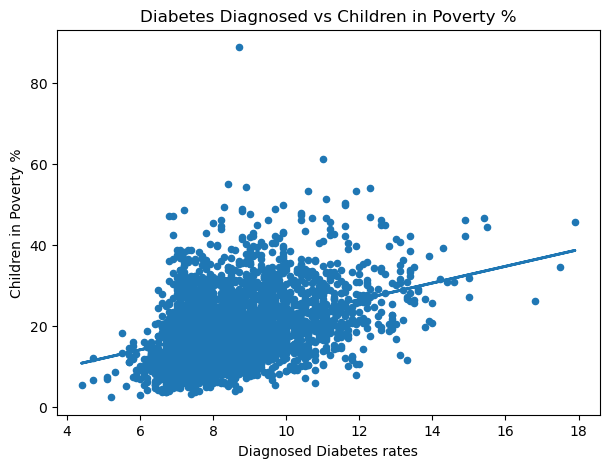

In [ ]:
# plotting correlation between diabetes diagnoses and children in poverty %

sub = full_df.dropna(subset=["Diagnosed Diabetes-2021-Percentage","Children in Poverty-2022 & 2018-2022-Percentage"]).copy()
x = sub["Diagnosed Diabetes-2021-Percentage"].values; y = sub["Children in Poverty-2022 & 2018-2022-Percentage"].values
coeff = np.polyfit(x, y, 1)
y_fit = np.polyval(coeff, x)
print("Slope:", coeff[0], "Intercept:", coeff[1])
plt.figure(figsize=(7,5))
plt.scatter(x,y,s=20)
plt.plot(x, y_fit, linewidth=2)
plt.xlabel("Diagnosed Diabetes rates"); plt.ylabel("Children in Poverty %")
plt.title("Diabetes Diagnosed vs Children in Poverty %")
plt.show()

## What is the relationship between the overall obesity rate and the diagnosed diabetes rate at the county level?

Slope: 2.5376084691413205 Intercept: 6.3931323771131865


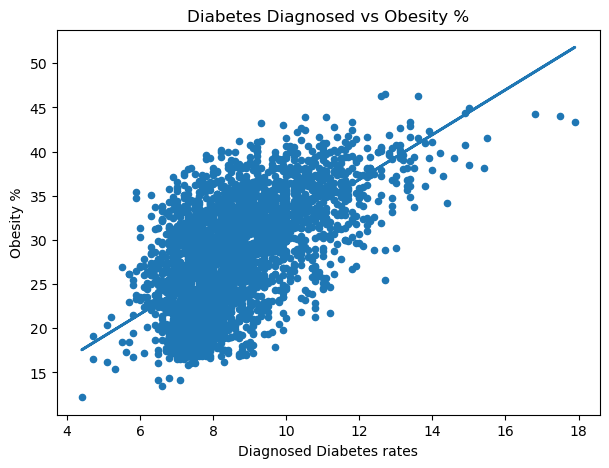

In [ ]:
# plotting correlation between diabetes diagnoses rates and obesity rates

sub = full_df.dropna(subset=["Diagnosed Diabetes-2021-Percentage","obesity-2021-Percentage"]).copy()
x = sub["Diagnosed Diabetes-2021-Percentage"].values; y = sub["obesity-2021-Percentage"].values
coeff = np.polyfit(x, y, 1)
y_fit = np.polyval(coeff, x)
print("Slope:", coeff[0], "Intercept:", coeff[1])
plt.figure(figsize=(7,5))
plt.scatter(x,y,s=20)
plt.plot(x, y_fit, linewidth=2)
plt.xlabel("Diagnosed Diabetes rates"); plt.ylabel("Obesity %")
plt.title("Diabetes Diagnosed vs Obesity %")
plt.show()